# Mean and standard deviation

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

Policzmy sumę prawdopodobieństw. Jeśli wyjdzie 1 to Y ma rozkład dyskretny. Policzmy najpierw dla $k>0$:
$$\sum_{k=1}^\infty P(Y=k)=\sum_{k=1}^\infty\frac{1}{k(k+1)(k+2)}=\frac{1}{2}\sum_{k=1}^\infty\left(\frac{1}{k(k+1)}-\frac{1}{(k+1)(k+2)}\right)=\frac{1}{2}\cdot\frac{1}{2}=\frac{1}{4}.$$
Teraz policzmy sumę dla $k<0$:
$$\sum_{k=1}^\infty P(Y=-k)=\sum_{k=1}^\infty\frac{1}{k(k+1)(k+2)}=\frac{1}{2}\sum_{k=1}^\infty\left(\frac{1}{k(k+1)}-\frac{1}{(k+1)(k+2)}\right)=\frac{1}{2}\cdot\frac{1}{2}=\frac{1}{4}.$$
Widzimy, że $\sum_{k=1}^\infty P(Y=k)+\sum_{k=1}^\infty P(Y=-k)+P(Y=0)=\frac{1}{4}+\frac{1}{4}+\frac{1}{2}=1$, czyli Y ma rozkład dyskretny. Policzmy EY:
$$EY=\sum_{k=1}^\infty\frac{k}{k(k+1)(k+2)}+\sum_{k=1}^\infty\frac{-k}{k(k+1)(k+2)}+0\cdot\frac{1}{2}=\sum_{k=1}^\infty\frac{1}{(k+1)(k+2)}+\sum_{k=1}^\infty\frac{-1}{(k+1)(k+2)}=\frac{1}{2}-\frac{1}{2}=0.$$
Policzmy wariancję Y:
$$Var=EY^2-(EY)^2=\sum_{k=1}^\infty\frac{k^2}{k(k+1)(k+2)}-0^2=\sum_{k=1}^\infty\frac{k}{(k+1)(k+2)}\sim\sum_{k=1}^\infty\frac{1}{k}=+\infty.$$
Ponieważ szereg jest rozbieżny, to Y nie ma wariancji.

In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

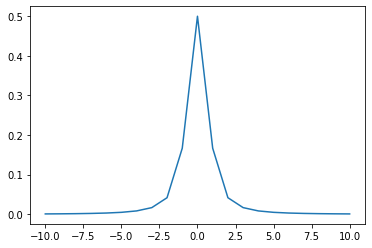

In [7]:
def f(k):
    if k == 0:
        return 0.5
    return 1 / (abs(k) * (abs(k) + 1) * (abs(k) + 2))


x1 = np.arange(-10, 11)
y1 = np.vectorize(f)(x1)

plt.plot(x1, y1)
plt.show()

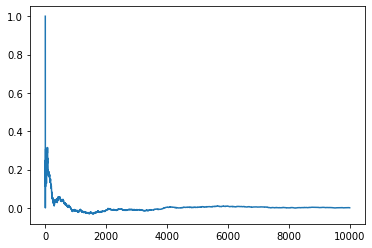

In [8]:
N = 10000


def cube_throw():
    val = np.random.randint(1, 5)

    if val == 1:
        return -1
    elif val == 4:
        return 1
    else:
        return 0


def find_k(x):
    k = 0
    while x >= 0:
        k += 1
        x -= 4 * f(x)

    return k


def sample():
    x = np.random.uniform(0, 1)
    return cube_throw() * find_k(x)


xs = np.arange(1, N + 1)
y = np.array([sample() for i in xs])
y_sum = np.cumsum(y)
means = y_sum / xs

plt.plot(means)
plt.show()

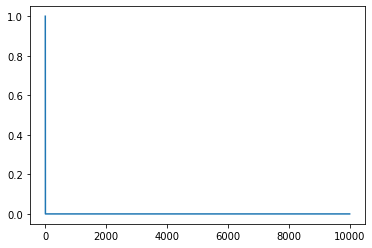

In [9]:
med = [np.median(y[:i]) for i in xs]

plt.plot(med)
plt.show()